In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/svm_rbf/ST001937/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
#create a gradient color palette 
gradient_palette = sns.blend_palette(palette, as_cmap=True)
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('../../../data/ST001937_bm.csv')
df.describe()

,"1,3,5(10)-estratrien-3,6- beta-17-beta-triol","1,5-anhydroglucitol",17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-1,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-2,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-3,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-4,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-5,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-6,1-hexadecanol,1-hydroxyanthraquinone prod,...,tyrosine-2,urea-1,urea-2,urea-3,urea-4,uridine,valine,xanthine,xanthosine,Phenotypes
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.060028,0.081831,0.121458,0.069002,0.153339,-0.028114,0.146952,0.141551,0.185913,0.117030,...,0.183951,0.187359,0.124397,0.203862,0.048426,0.036753,0.098137,0.052093,0.053100,0.500000
std,1.149557,1.157614,1.158775,1.177830,1.145922,1.348227,1.291587,1.301322,1.262072,1.132816,...,1.277060,1.208034,1.178328,1.225597,1.107458,1.237427,1.376308,1.179492,1.101968,0.500417
min,-10.056505,-7.753742,-1.103028,-2.246114,-0.763127,-16.350768,-0.914859,-1.005143,-1.729810,-1.077471,...,-1.465182,-1.484441,-1.278308,-1.639386,-0.333746,-1.310151,-6.831118,-0.307711,-0.696013,0.000000
25%,-0.231721,-0.132294,-0.417097,-0.395316,-0.624346,-0.018728,-0.455456,-0.427082,-0.343499,-0.449774,...,-0.439113,-0.414939,-0.494908,-0.420323,-0.309578,-0.103505,-0.237340,-0.219645,-0.570936,0.000000
50%,-0.191786,0.010058,-0.160029,-0.288463,-0.094491,0.009537,-0.084182,-0.116827,-0.006010,-0.214784,...,0.054435,0.005286,-0.066947,0.023258,-0.287017,-0.097975,-0.178884,-0.138027,-0.318293,0.500000
75%,-0.079706,0.151365,0.273505,0.039505,0.463881,0.044281,0.381119,0.308743,0.305460,0.256809,...,0.539822,0.569464,0.515155,0.525831,-0.198019,-0.074318,-0.036841,-0.002379,0.264024,1.000000
max,10.238873,21.620913,12.565668,12.303188,11.517330,18.100453,19.023871,14.488387,13.043171,8.233442,...,15.882220,13.595483,15.495354,15.010304,15.049450,23.156958,17.689525,21.882814,10.082669,1.000000


In [131]:
# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

In [132]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVC

# Definisci il modello
model = SVC(kernel='rbf')

# Definisci la griglia dei parametri da esplorare
param_grid = {
    'C': np.logspace(-1.5, 2, 60),
    'gamma': np.logspace(-4, -1, 60)
}

# Esegui la ricerca esaustiva dei parametri
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

# Stampa i migliori parametri trovati
print("Migliori parametri:")
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits
[CV] END ................C=0.03162277660168379, gamma=0.0001; total time=   0.1s
[CV] END C=0.03162277660168379, gamma=0.00011242100350620863; total time=   0.1s
[CV] END C=0.03162277660168379, gamma=0.00011242100350620863; total time=   0.1s
[CV] END C=0.03162277660168379, gamma=0.00011242100350620863; total time=   0.1s
[CV] END C=0.03162277660168379, gamma=0.00012638482029342984; total time=   0.1s
[CV] END C=0.03162277660168379, gamma=0.00014208308325339223; total time=   0.2s
[CV] END .C=0.03162277660168379, gamma=0.0001597312280060254; total time=   0.3s
[CV] END C=0.03162277660168379, gamma=0.00022695105366946685; total time=   0.2s
[CV] END C=0.03162277660168379, gamma=0.00028683168133420117; total time=   0.2s
[CV] END C=0.03162277660168379, gamma=0.00032245905452963947; total time=   0.2s
[CV] END .C=0.03162277660168379, gamma=0.0004075392965871778; total time=   0.2s
[CV] END .C=0.03162277660168379, gamma=0.0

/tmp/ipykernel_28969/3686325791.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
/tmp/ipykernel_28969/3686325791.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


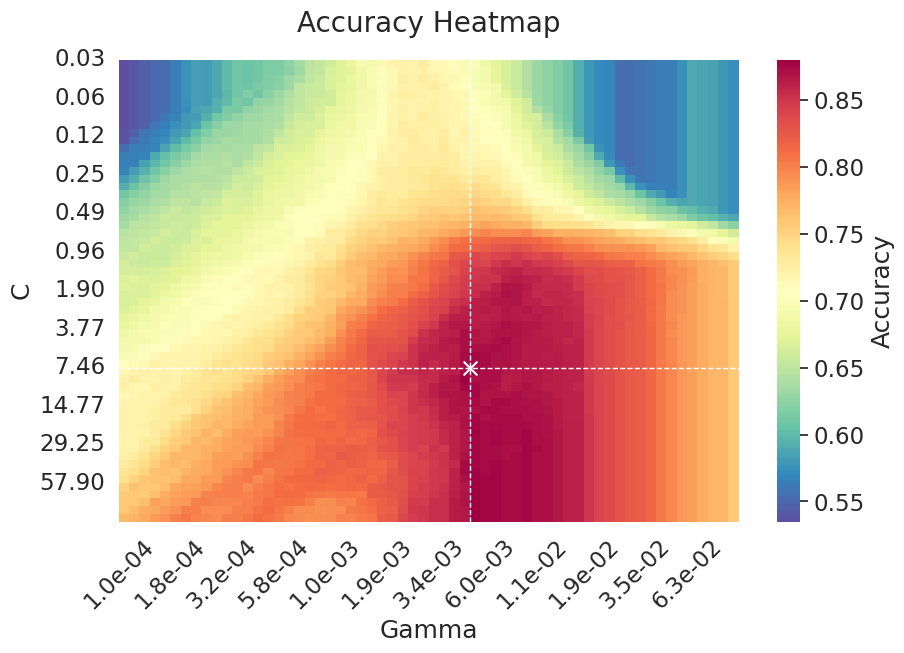

In [133]:
#visualize the results of the grid search in a heatmap

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

#select the best c
best_c = 40
best_gamma = results.columns.get_loc(grid_search.best_params_['gamma'])

plt.figure(figsize=(10, 6))
sns.heatmap(results, cmap='Spectral_r' , cbar_kws={'label': 'Accuracy'})
plt.xlabel('Gamma')
plt.ylabel('C')
plt.axhline(y=best_c, color='white', linestyle='dashed', linewidth=1)
plt.axvline(x=best_gamma, color='white', linestyle='dashed', linewidth=1)
plt.scatter(best_gamma, best_c, color='white', s=100, marker='x')

# Imposta ticks e labels per gli assi x e y
gamma_ticks = np.arange(0, len(param_grid['gamma']), 5)
gamma_labels = ['{:.1e}'.format(param_grid['gamma'][i]) for i in gamma_ticks]
plt.xticks(ticks=gamma_ticks, labels=gamma_labels, rotation=45)

C_ticks = np.arange(0, len(param_grid['C']), 5)
C_labels = ['{:.2f}'.format(param_grid['C'][i]) for i in C_ticks]
plt.yticks(ticks=C_ticks, labels=C_labels)
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.title('Accuracy Heatmap', fontsize=20, pad=20)
plt.show()



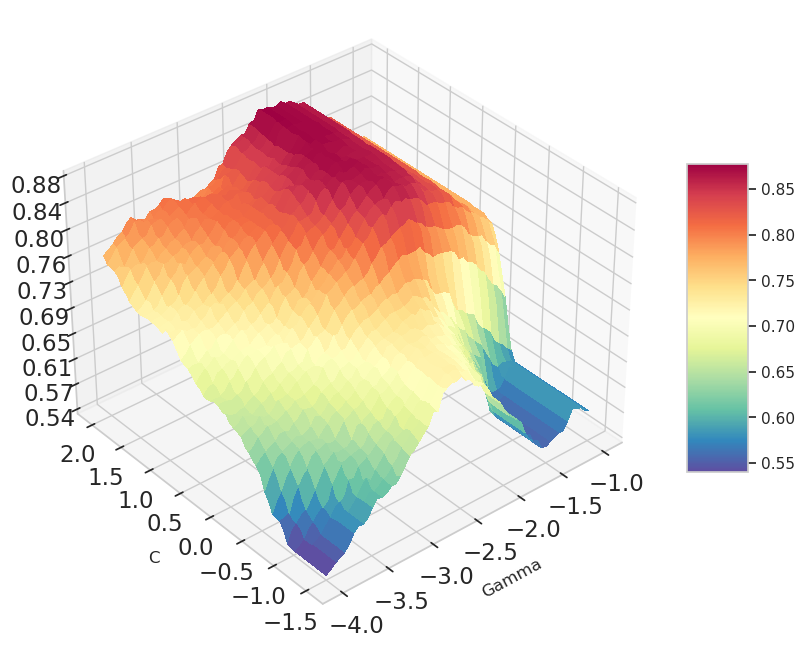

In [134]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

X, Y = np.meshgrid(np.log10(param_grid['gamma']), np.log10(param_grid['C']))
Z = results.values

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap='Spectral_r')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(35, 230)
sns.set(style="whitegrid", font_scale=1)
plt.xlabel('Gamma', fontsize=12, labelpad=10)
plt.ylabel('C', fontsize=12, labelpad=10)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig(fname=output_directory + 'accuracy_heatmap.png', dpi=300, bbox_inches='tight')

In [136]:
z_angle = np.concatenate((np.linspace(30, 50, 180), np.linspace(50, 30, 180)))
for angle in range(0, 360, 1):
    angle = (angle + 230) % 360
    plt.rcParams['figure.figsize'] = [10, 8]
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap='Spectral_r')

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Set the angle of the camera
    ax.view_init(z_angle[angle], angle)
    sns.set(style="whitegrid", font_scale=1)
    plt.xlabel('Gamma', fontsize=12, labelpad=10)
    plt.ylabel('C', fontsize=12, labelpad=10)
    # Save it
    filename = output_directory + 'animation/' + f'{angle}.png'
    plt.savefig(fname=filename, dpi=96)
    plt.clf()
    plt.close(fig)